In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
#load the text file
with open("Warehouse_tracking_2.txt") as file:
    lines = file.readlines()
    data = []
    for line in lines:
        data.append(line.split("\t"))

In [3]:
# assign the first row of data to columns
columns = data[0]
print(columns)
# rename the last column
columns[-1] = "Ergonomic"
print(columns)
# use list slicing to update data - all but the first row
data = data[1:]
# print(list)

['Area', 'Workplace', 'Orders picked', 'Order picking errors', 'Article', 'Hours run', 'Hours maintenance', 'Date', 'Shift', 'Ergonomic\n']
['Area', 'Workplace', 'Orders picked', 'Order picking errors', 'Article', 'Hours run', 'Hours maintenance', 'Date', 'Shift', 'Ergonomic']


In [4]:
# create the Pandas dataframe named df with data and columns
df = pd.DataFrame(data, columns =columns)

In [5]:
# Exploratory data analysis

print(df.head())
print("\n")
print("Shape of the data: ", df.shape)
print("\n")
# here we see that the values in the last column Ergonomic has unnecessary characters at the end
# so we need to strip these characters in every row
df.Ergonomic = df.Ergonomic.apply(lambda x: x.strip("\n"))
# Rows containing duplicate data
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape[0])

# searching for null values
print("\n")
print("Missing values:", "\n", df.isnull().sum())

  Area Workplace Orders picked Order picking errors           Article  \
0    1         A           437                    5         Red shoes   
1    1         B           500                    2        Black hats   
2    1         C           360                    9  Yellow raincoats   
3    1         D           415                    3      Green shirts   
4    1         E           399                    8     Purple skirts   

  Hours run Hours maintenance        Date  Shift Ergonomic  
0        12                 0  01.01.2022  Tango     Yes\n  
1        11                 1  01.01.2022  Tango     Yes\n  
2        11                 1  01.01.2022  Tango      No\n  
3        12                 0  01.01.2022  Tango      No\n  
4        12                 0  01.01.2022  Tango      No\n  


Shape of the data:  (168, 10)


Number of duplicate rows:  0


Missing values: 
 Area                    0
Workplace               0
Orders picked           0
Order picking errors    0
Article 

In [6]:
print("\n")
print(df.info())
# furthermore we see that all datatypes are object, which is not true and
# we have to change that to be able to further analyze and ultimately use the data properly
# change all columns that contain integer values to the according datatype, except Area
df["Hours run"] = df["Hours run"].apply(pd.to_numeric)
df["Hours maintenance"] = df["Hours maintenance"].apply(pd.to_numeric)
df["Orders picked"] = df["Orders picked"].apply(pd.to_numeric)
df["Order picking errors"] = df["Order picking errors"].apply(pd.to_numeric)

# convert the date string to a datetime datatype - not necessary for this program
# df["Date"] = df["Date"].apply(lambda x: x.replace(".", "-"))
# df["Date"] = df["Date"].apply(lambda x: pd.to_datetime(x, dayfirst=True))

# make a new column of hourly productivity, Orders picked divided by Hours run
df["Hourly productivity"] = df["Orders picked"] / df["Hours run"]
# print(df["Hourly productivity"])

# make a new column with the days
df["Days"] = df.Date.apply(lambda x: x.split(".")[0][-1])
print(df.dtypes)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Area                  168 non-null    object
 1   Workplace             168 non-null    object
 2   Orders picked         168 non-null    object
 3   Order picking errors  168 non-null    object
 4   Article               168 non-null    object
 5   Hours run             168 non-null    object
 6   Hours maintenance     168 non-null    object
 7   Date                  168 non-null    object
 8   Shift                 168 non-null    object
 9   Ergonomic             168 non-null    object
dtypes: object(10)
memory usage: 13.2+ KB
None
Area                     object
Workplace                object
Orders picked             int64
Order picking errors      int64
Article                  object
Hours run                 int64
Hours maintenance         int64
Date                  

In [7]:
# looking at the general statistical parameters of the integer columns
print(df.describe())

       Orders picked  Order picking errors   Hours run  Hours maintenance  \
count     168.000000            168.000000  168.000000         168.000000   
mean      508.172619              5.178571   11.005952           0.994048   
std        82.157071              2.694686    1.129342           1.129342   
min       241.000000              0.000000    7.000000           0.000000   
25%       450.000000              3.000000   10.000000           0.000000   
50%       512.500000              5.000000   11.000000           1.000000   
75%       580.000000              7.000000   12.000000           2.000000   
max       640.000000             13.000000   12.000000           5.000000   

       Hourly productivity  
count           168.000000  
mean             46.249062  
std               6.579551  
min              32.100000  
25%              41.645833  
50%              47.261364  
75%              50.789773  
max              62.625000  


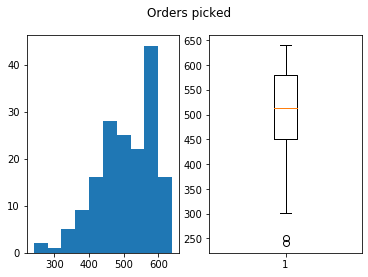

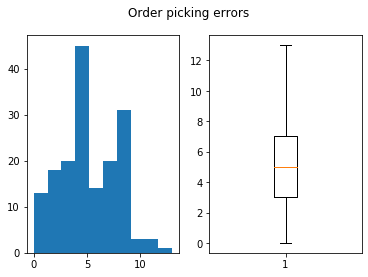

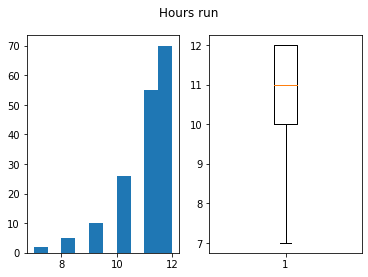

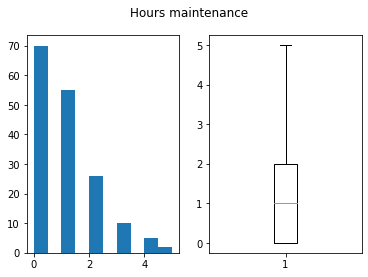

In [16]:
# look at the distribution of the values and detect outliers via histograms and boxplots
# column Orders picked
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Orders picked")
ax1.hist(df["Orders picked"])
ax2.boxplot(df["Orders picked"])
# plt.savefig("Orders picked.jpg")
plt.show()
plt.close("all")

# column Order picking errors
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Order picking errors")
ax1.hist(df["Order picking errors"])
ax2.boxplot(df["Order picking errors"])
# plt.savefig("Order picking errors.jpg")
plt.show()
plt.close("all")

# column Hours run
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Hours run")
ax1.hist(df["Hours run"])
ax2.boxplot(df["Hours run"])
# plt.savefig("Hours run.jpg")
plt.show()
plt.close("all")

#column Hours maintenance
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle("Hours maintenance")
ax1.hist(df["Hours maintenance"])
ax2.boxplot(df["Hours maintenance"])
# plt.savefig("Hours maintenance.jpg")
plt.show()
plt.close("all")

In [9]:
# Data Visualization / Data Science findings
# print(df["Article"].value_counts())
print(df.groupby(df.Article)["Orders picked"].sum(), "\n")
print(df.groupby(df.Article)["Orders picked"].mean(), "\n")
print("The most popular article: {} - averagely picked {} times - totally picked {} times".format("Orange socks", df.groupby(df.Article)["Orders picked"].mean().max(), df.groupby(df.Article)["Orders picked"].sum().max()))

Article
Beige jackets       5945
Black dresses       5779
Black hats          5875
Blue tops           6334
Blue trousers       6221
Brown cardigans     6455
Green pyjamas       6215
Green shirts        5949
Orange socks        6919
Purple skirts       6178
Red coats           5735
Red shoes           5906
Yellow jumpers      5990
Yellow raincoats    5872
Name: Orders picked, dtype: int64 

Article
Beige jackets       495.416667
Black dresses       481.583333
Black hats          489.583333
Blue tops           527.833333
Blue trousers       518.416667
Brown cardigans     537.916667
Green pyjamas       517.916667
Green shirts        495.750000
Orange socks        576.583333
Purple skirts       514.833333
Red coats           477.916667
Red shoes           492.166667
Yellow jumpers      499.166667
Yellow raincoats    489.333333
Name: Orders picked, dtype: float64 

The most popular article: Orange socks - averagely picked 576.5833333333334 times - totally picked 6919 times


C:\Users\lukas\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


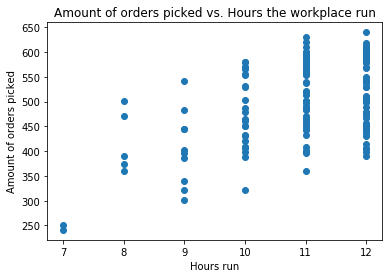

In [17]:
# compare amount of orders picked vs. Hours the workplace run
plt.scatter(df["Hours run"], df["Orders picked"])
ax = plt.subplot()
ax.set_xlabel("Hours run")
ax.set_ylabel("Amount of orders picked")
plt.title("Amount of orders picked vs. Hours the workplace run")
# plt.savefig("Orders picked vs. hours run.jpg")
plt.show()

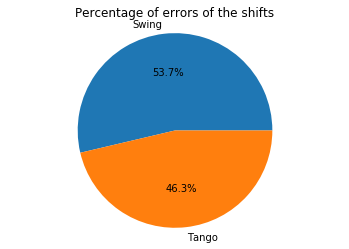

In [18]:
# compare and visualize the distribution of order picking errors per shift
error_shift = df.groupby(["Shift"])["Order picking errors"].sum()
# print(error_shift)
plt.pie(error_shift, labels=["Swing", "Tango"], autopct="%.1f%%")
plt.axis("equal")
plt.title("Percentage of errors of the shifts")
# plt.savefig("Percentage of errors_shift.jpg")
plt.show()
plt.close("all")

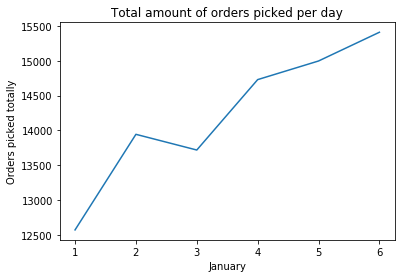

In [34]:
# visualize the total amount of orders picked per day
orders_picked_per_day = df.groupby("Days")["Orders picked"].sum()
errors_per_day = df.groupby("Days")["Order picking errors"].sum()
plt.plot(["1", "2", "3", "4", "5", "6"], orders_picked_per_day)
plt.xlabel("January")
plt.ylabel("Orders picked totally")
plt.title("Total amount of orders picked per day")
# plt.savefig("Orders totally picked daily.jpg")
plt.show()

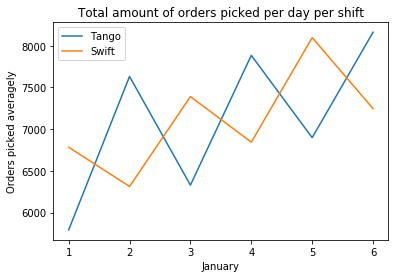

In [37]:
# visualize the total amount of orders picked per day per shift
orders_picked_per_day_tango = df[df.Shift == "Tango"].groupby("Days")["Orders picked"].sum()
plt.plot(["1", "2", "3", "4", "5", "6"], orders_picked_per_day_tango)
orders_picked_per_day_swing = df[df.Shift == "Swing"].groupby("Days")["Orders picked"].sum()
plt.plot(["1", "2", "3", "4", "5", "6"], orders_picked_per_day_swing)
plt.xlabel("January")
plt.ylabel("Orders picked averagely")
plt.title("Total amount of orders picked per day per shift")
plt.legend(["Tango", "Swift"])
# plt.savefig("Orders totally picked daily per shift.jpg")
plt.show()

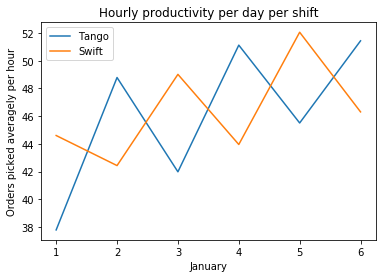

In [27]:
# visualize the hourly productivity per day per shift
hourly_productivity_tango = df[df.Shift == "Tango"].groupby("Days")["Hourly productivity"].mean()
# errors_per_day = df.groupby("Days")["Order picking errors"].mean()
plt.plot(["1", "2", "3", "4", "5", "6"], hourly_productivity_tango)
hourly_productivity_swing = df[df.Shift == "Swing"].groupby("Days")["Hourly productivity"].mean()
plt.plot(["1", "2", "3", "4", "5", "6"], hourly_productivity_swing)
plt.xlabel("January")
plt.ylabel("Orders picked averagely per hour")
plt.title("Hourly productivity per day per shift")
plt.legend(["Tango", "Swift"])
# plt.savefig("Hourly productivity per day per shift.jpg")
plt.show()

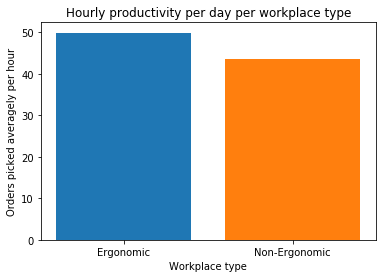

In [35]:
# compare and visualize the hourly productivity vs. the workplace type
hourly_productivity_ergonomic = df[df.Ergonomic == "Yes"]["Hourly productivity"].mean()
plt.bar("Ergonomic", hourly_productivity_ergonomic)
hourly_productivity_nonergonomic = df[df.Ergonomic == "No"]["Hourly productivity"].mean()
plt.bar("Non-Ergonomic", hourly_productivity_nonergonomic)
plt.xlabel("Workplace type")
plt.ylabel("Orders picked averagely per hour")
plt.title("Hourly productivity per day per workplace type")
# plt.savefig("Hourly productivity per day per workplace type.jpg")
plt.show()